# <font color="maroon"> K- means clustering of football players using principal component analysis </font>

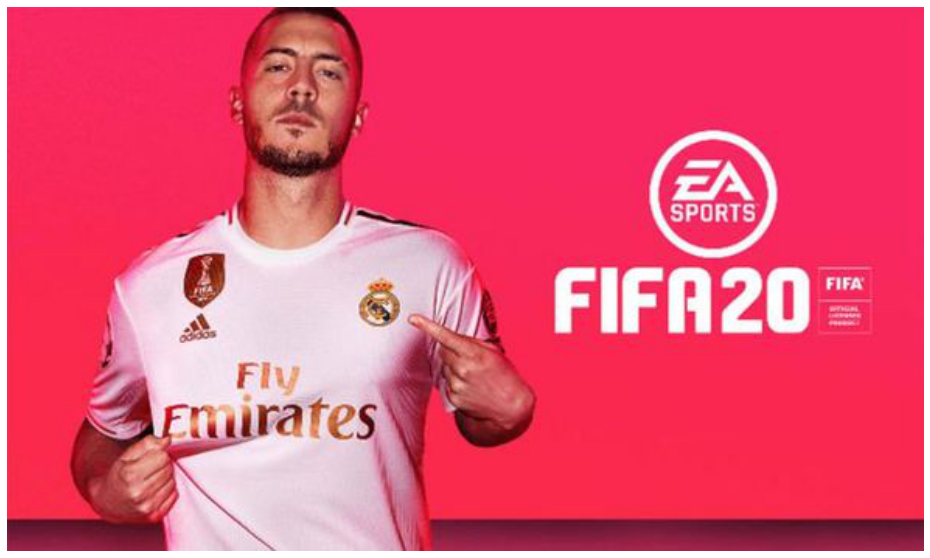

In [126]:
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline

plt.figure(figsize=(20,10))
img = np.array(Image.open(r"D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\FIFA20\cover.jpg"))
plt.imshow(img,interpolation="bilinear")
plt.axis("off")
plt.show()

# Data - content

1. Player 100+ attributes
2. URL of the player
3. Player positions, with the role in the club and in the national team
4. Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.
5. Player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc.

In [127]:
import numpy as np
import os
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

os.chdir('D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\FIFA20')
player_info=pd.read_csv('players_2020.csv')
player_info.columns.values

array(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'mo

###### Dropping unwanted columns (player url, Nationality, club name, joined date, preferred foot) ,  strong influencing variables (overall score, potential score) and duplicated variables (goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes) which might impact the clustering results

In [128]:
player_info.drop(columns=['player_url','long_name','dob','nationality','club','overall','potential','value_eur','wage_eur', \
                          'player_positions', 'preferred_foot','body_type','real_face','release_clause_eur','player_tags', \
                          'team_position','team_jersey_number','loaned_from','joined','contract_valid_until','nation_position', \
                         'nation_jersey_number','player_traits','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm',\
                          'lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','work_rate', \
                         'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',\
                          'goalkeeping_positioning','goalkeeping_reflexes'],inplace=True)

### Replacing the null values with 0's

In [129]:
# To look at the columns with number of missing values 
null_counts=player_info.isna().sum().sort_values(ascending=False)
null_counts[null_counts>0]

gk_positioning    16242
gk_speed          16242
gk_reflexes       16242
gk_kicking        16242
gk_handling       16242
gk_diving         16242
dribbling          2036
physic             2036
pace               2036
shooting           2036
passing            2036
defending          2036
dtype: int64

In [130]:
#Filling missing values with 0's
player_info.fillna(value=0,inplace=True)
player_info.head()

,sofifa_id,short_name,age,height_cm,weight_kg,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,158023,L. Messi,32,170,72,5,4,4,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26
1,20801,Cristiano Ronaldo,34,187,83,5,4,5,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24
2,190871,Neymar Jr,27,175,68,5,5,5,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29
3,200389,J. Oblak,26,188,87,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18
4,183277,E. Hazard,28,175,74,4,4,4,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22


## <font color="maroon"> Prerequisites before clustering

### 1. Variable Transformation. Skewed variables yield unstable clusters

In [338]:
print('The skewness of the variables are ')
skewness=player_info.skew(axis = 0, skipna = True,numeric_only=True).sort_values(ascending=False) 
skewness[(skewness>1.5) | (skewness<-1.5)]

The skewness of the variables are 


international_reputation    4.296515
gk_speed                    2.836030
gk_positioning              2.562799
gk_reflexes                 2.550482
gk_kicking                  2.549621
gk_diving                   2.544586
gk_handling                 2.540889
pace                       -1.629777
dribbling                  -1.652617
physic                     -1.744212
sofifa_id                  -1.950603
dtype: float64

In [132]:
# player_info['log_international_reputation']=np.log(player_info['international_reputation'])
# player_info['log_gk_speed']=np.log(player_info['gk_speed']+0.01)
# player_info['log_gk_positioning']=np.log(player_info['gk_positioning']+0.001)
# player_info['log_gk_reflexes']=np.log(player_info['gk_reflexes']+0.001)
# player_info['log_gk_kicking']=np.log(player_info['gk_kicking']+0.001)
# player_info['log_gk_diving']=np.log(player_info['gk_diving']+0.001)
# player_info['log_gk_handling']=np.log(player_info['gk_handling']+0.001)

### 2. Scaling the variables . The reason is that the eucledian distance between the observations is used as dissimilarity measure. Having variables with different units yeild wrong clusters

In [256]:
from sklearn.preprocessing import MinMaxScaler

player_values=player_info.iloc[ :, 3:49].values
scaler = MinMaxScaler()  
player_values_scaled = scaler.fit_transform(player_values)
columns=player_info.columns[3:49]
player_values_scaled = pd.DataFrame(player_values_scaled,columns=columns)
player_values_scaled.head()

,height_cm,weight_kg,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,0.285714,0.366667,1.00,0.75,0.75,0.906250,0.989247,1.000000,1.000000,0.433333,0.733333,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.943182,1.000000,0.738636,1.000000,0.977011,1.000000,0.988636,1.000000,1.000000,1.000000,0.929412,0.858824,0.964706,0.986667,0.976471,0.888889,0.644737,0.741176,0.623377,1.000000,0.453488,0.415730,0.989247,1.000000,0.800000,1.000000,0.344086,0.367816,0.264368
1,0.632653,0.550000,1.00,0.75,1.00,0.937500,1.000000,0.891304,0.927083,0.388889,0.866667,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.897727,0.989247,0.954545,0.894118,0.965517,0.913978,0.852273,0.800000,0.821429,0.956044,0.905882,0.941176,0.894118,1.000000,0.694118,1.000000,1.000000,0.858824,0.753247,0.988889,0.627907,0.292135,1.000000,0.858824,0.917647,0.988095,0.290323,0.310345,0.241379
2,0.387755,0.300000,1.00,1.00,1.00,0.947917,0.913978,0.945652,0.989583,0.355556,0.644444,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.931818,0.913978,0.647727,0.941176,0.965517,0.989247,0.931818,0.922222,0.869048,0.989011,0.964706,0.917647,1.000000,0.946667,0.847059,0.814815,0.552632,0.811765,0.376623,0.888889,0.488372,0.370787,0.913978,0.952941,0.976471,0.976190,0.279570,0.241379,0.298851
3,0.653061,0.616667,0.50,0.50,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.966667,1.0,0.83871,0.967391,0.8,0.989011,0.090909,0.096774,0.113636,0.423529,0.114943,0.086022,0.079545,0.111111,0.380952,0.274725,0.364706,0.576471,0.658824,0.893333,0.435294,0.555556,0.776316,0.341176,0.753247,0.088889,0.290698,0.179775,0.096774,0.658824,0.047059,0.666667,0.279570,0.080460,0.172414
4,0.387755,0.400000,0.75,0.75,0.75,0.947917,0.892473,0.934783,0.979167,0.388889,0.733333,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.863636,0.881720,0.636364,0.964706,0.919540,0.978495,0.875000,0.833333,0.892857,0.978022,0.964706,0.905882,0.988235,0.920000,0.964706,0.839506,0.486842,0.847059,0.558442,0.844444,0.523256,0.426966,0.913978,0.941176,0.952941,0.940476,0.354839,0.252874,0.218391


### 3. Looking at the correlation among the variables 

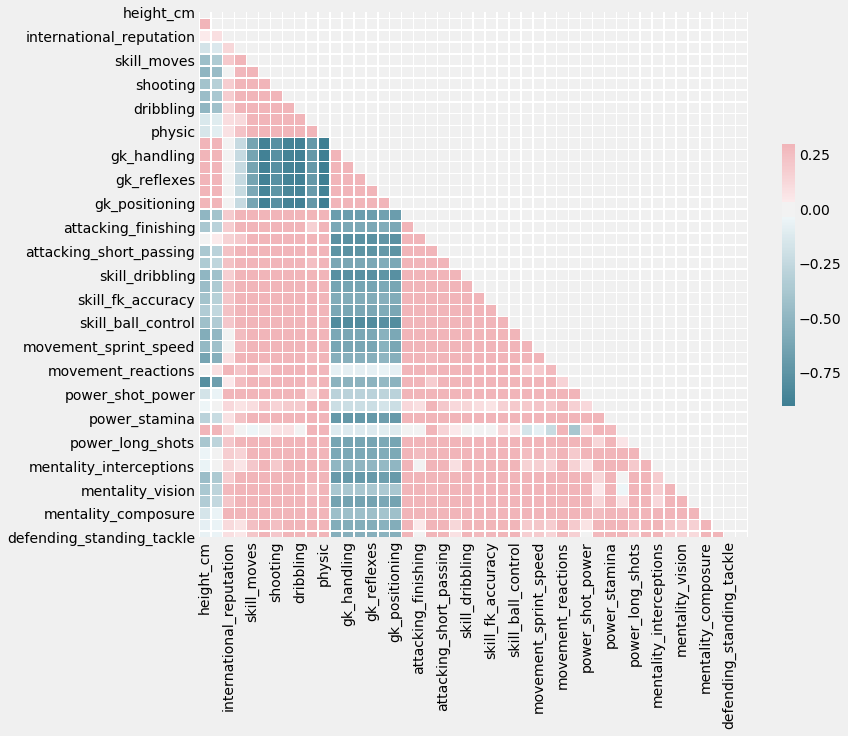

In [278]:
import seaborn as sns
corr = player_values_scaled.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

#### The variables seems to be correlated with each other. We can use principal components to get more distinct clusters in this scenario

## <font color="blue"> Principal Component Analysis

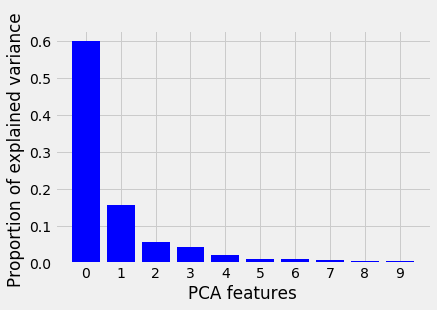

In [447]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components = 10, random_state=1)
X_pca = pca.fit_transform(player_values_scaled)

#Percentage of variance explained by using 2 components
pca.explained_variance_ratio_.cumsum()

from sklearn.decomposition import PCA
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('Proportion of explained variance ')
plt.xticks(features)
plt.show()

### Plotting PCA to visualize the clusters. Clusters look distinct

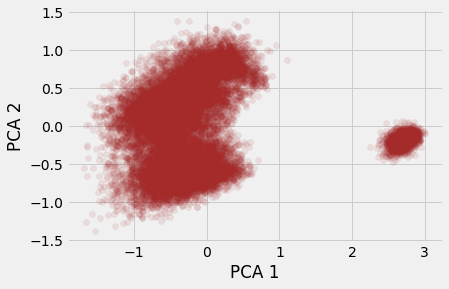

In [448]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(X_pca)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='brown')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## <font color="darkblue"> ****************K-means CLustering Algorithm**************

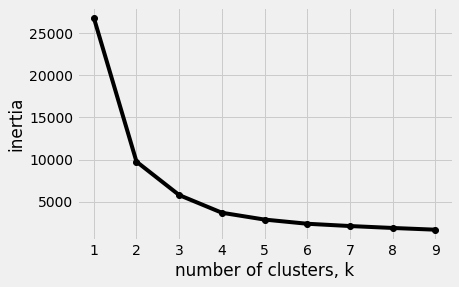

In [266]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


### From the elbow/scree plot, there are 3 or 4 clusters. If we consider number of clusters as 3, there won't be any distinction between the midfielders and strikers. I have considered only 3 clusters

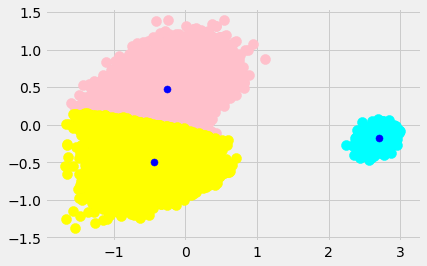

In [450]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(PCA_components)
PCA_components = np.array(PCA_components) 
plt.scatter(PCA_components[y_means == 0, 0], PCA_components[y_means == 0, 1], s = 100, c = 'pink')
plt.scatter(PCA_components[y_means == 1, 0], PCA_components[y_means == 1, 1], s = 100, c = 'yellow')
plt.scatter(PCA_components[y_means == 2, 0], PCA_components[y_means == 2, 1], s = 100, c = 'cyan')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue')
plt.show()

### Appending the cluster number to the original data frame to describe the clusters

In [459]:
y_means_df=pd.DataFrame(y_means)
y_means_df.columns=['cluster']
Player_info_clustered=pd.concat([player_info,y_means_df],axis=1)

# Describing the clusters

### <font color="darkgreen"> Cluster 1 : Defenders </font>

In [460]:
print(' The players belonging to Cluster 1 are DEFENDERS')
Player_info_clustered[Player_info_clustered['cluster']==0]['short_name'].head()  

 The players belonging to Cluster 1 are DEFENDERS


7      V. van Dijk
11    K. Koulibaly
15        N. Kanté
16    G. Chiellini
18    Sergio Ramos
Name: short_name, dtype: object

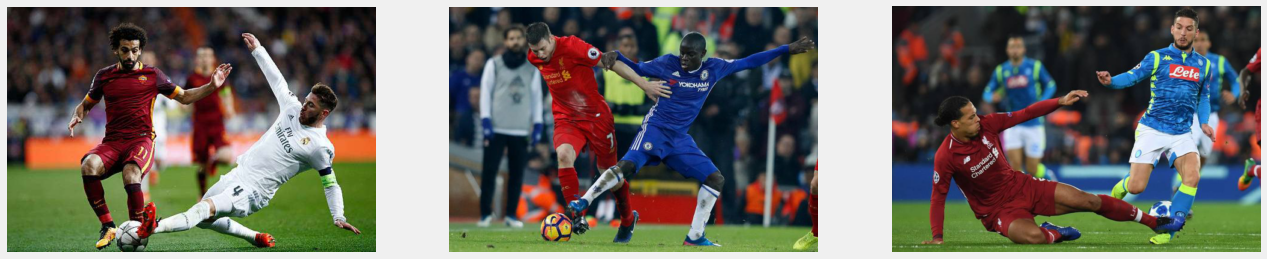

           Sergio Ramos                             N. Kanté                                     V. van Dijk


In [461]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,3,1)
img = np.array(Image.open(r"D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\FIFA20\ramos.jpg"))
ax1.imshow(img,interpolation="bilinear")
ax1.grid(False)
plt.axis('off')
ax2 = fig.add_subplot(1,3,2)
img = np.array(Image.open(r"D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\FIFA20\kante.jpg"))
ax2.imshow(img,interpolation="bilinear")
ax2.grid(False)
plt.axis('off')
ax3 = fig.add_subplot(1,3,3)
img = np.array(Image.open(r"D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\FIFA20\vandijk.jpg"))
ax3.imshow(img,interpolation="bilinear")
ax3.grid(False)
plt.axis('off')
plt.show()

defenders=Player_info_clustered[Player_info_clustered['cluster']==0]['short_name'].head()            
print('           '+defenders.tolist()[4]+'                             '+ defenders.tolist()[2]+'                                     '+ defenders.tolist()[0]) 

### <font color="blue"> Cluster 2 : Mid- Fielders and Forwards </font>

In [462]:
print(' The players belonging to Cluster 1 are MIDFIELDERS AND FORWARDS')
Player_info_clustered[Player_info_clustered['cluster']==1]['short_name'].head()  

 The players belonging to Cluster 1 are MIDFIELDERS AND FORWARDS


0             L. Messi
1    Cristiano Ronaldo
2            Neymar Jr
4            E. Hazard
5         K. De Bruyne
Name: short_name, dtype: object

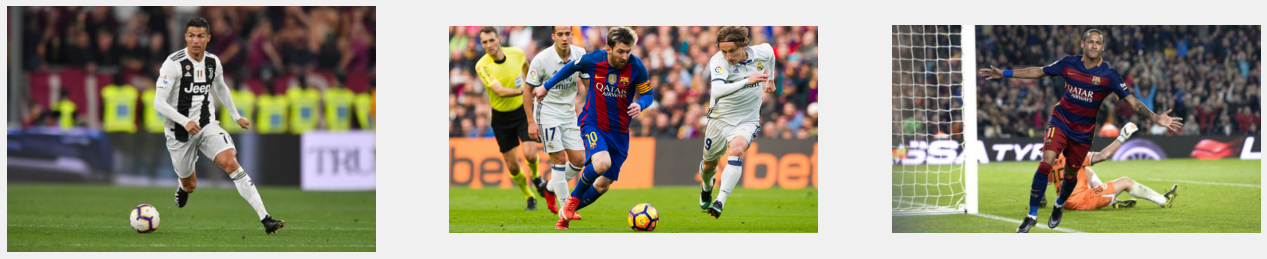

           Cristiano Ronaldo                             L. Messi                                     Neymar Jr


In [463]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,3,1)
img = np.array(Image.open(r"D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\FIFA20\ronaldo.jpg"))
ax1.imshow(img,interpolation="bilinear")
ax1.grid(False)
plt.axis('off')
ax2 = fig.add_subplot(1,3,2)
img = np.array(Image.open(r"D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\FIFA20\messi.jpg"))
ax2.imshow(img,interpolation="bilinear")
ax2.grid(False)
plt.axis('off')
ax3 = fig.add_subplot(1,3,3)
img = np.array(Image.open(r"D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\FIFA20\neymar.jpg"))
ax3.imshow(img,interpolation="bilinear")
ax3.grid(False)
plt.axis('off')
plt.show()

midfielders=Player_info_clustered[Player_info_clustered['cluster']==1]['short_name'].head()            
print('           '+midfielders.tolist()[1]+'                             '+ midfielders.tolist()[0]+'                                     '+ midfielders.tolist()[2]) 

### <font color="orange"> Cluster 3 : Goal Keepers </font>

In [464]:
print(' The players belonging to Cluster 3 are GOAL KEEPERS')
Player_info_clustered[Player_info_clustered['cluster']==2]['short_name'].head()

 The players belonging to Cluster 3 are GOAL KEEPERS


3          J. Oblak
6     M. ter Stegen
13          Alisson
14           De Gea
25          Ederson
Name: short_name, dtype: object

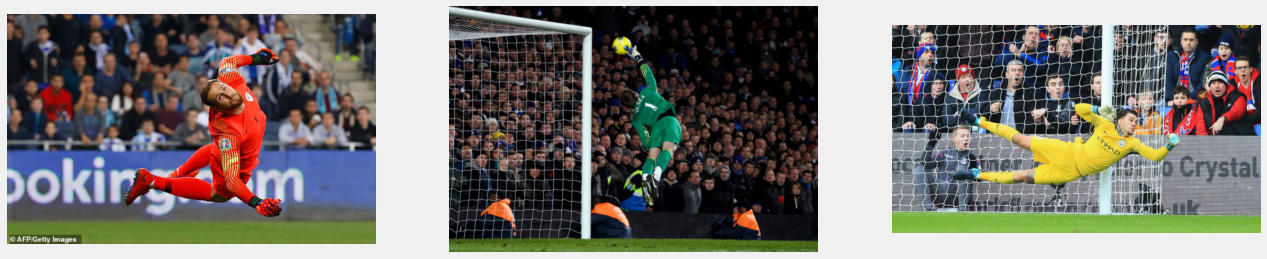

           J. Oblak                             De Gea                                     Ederson


In [457]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,3,1)
img = np.array(Image.open(r"D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\FIFA20\oblak.jpg"))
ax1.imshow(img,interpolation="bilinear")
ax1.grid(False)
plt.axis('off')
ax2 = fig.add_subplot(1,3,2)
img = np.array(Image.open(r"D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\FIFA20\degea.jpg"))
ax2.imshow(img,interpolation="bilinear")
ax2.grid(False)
plt.axis('off')
ax3 = fig.add_subplot(1,3,3)
img = np.array(Image.open(r"D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\FIFA20\ederson.jpg"))
ax3.imshow(img,interpolation="bilinear")
ax3.grid(False)
plt.axis('off')
plt.show()

goalkeepers=Player_info_clustered[Player_info_clustered['cluster']==2]['short_name'].head()            
print('           '+goalkeepers.tolist()[0]+'                             '+ goalkeepers.tolist()[3]+'                                     '+ goalkeepers.tolist()[4]) 